c:\Users\DELL\Desktop\nlp_arabic_fatiha\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


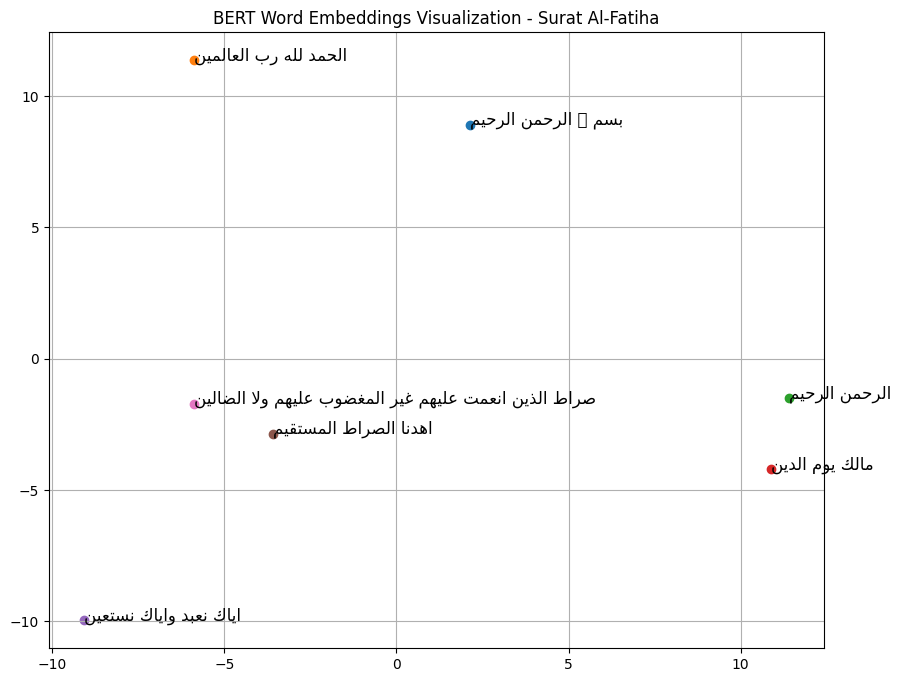

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import arabic_reshaper
from bidi.algorithm import get_display

# 1. تحميل المتجهات والنصوص
embeddings = np.load('../models/embeddings/bert_embeddings.npy')
with open('../data/processed/cleaned_fatiha.txt', 'r', encoding='utf-8') as f:
    words = [line.strip() for line in f.readlines() if line.strip()]

# 2. تقليل الأبعاد إلى 2D
pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)

# 3. الرسم البياني مع معالجة اللغة العربية
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    # تشكيل الكلمات العربية لتظهر بشكل صحيح في الرسم
    reshaped_word = arabic_reshaper.reshape(word)
    display_word = get_display(reshaped_word)
    
    plt.scatter(coords[i, 0], coords[i, 1])
    plt.annotate(display_word, (coords[i, 0], coords[i, 1]), fontsize=12)

plt.title("BERT Word Embeddings Visualization - Surat Al-Fatiha")
plt.grid(True)
plt.show()